# ESGU

In [1]:
import pandas as pd
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# 주가 데이터 로드 (예: CSV 파일에서)
ESGU = pd.read_csv('C:/Users/swc08/Desktop/대학/DB보험금융공모전/데이터셋/ESGU.csv', parse_dates=['Date'])
ESGU.set_index('Date', inplace=True)

# 이벤트 날짜와 이벤트 윈도우, 추정 윈도우 설정
event_date = pd.Timestamp('2017-01-20')
estimation_window = 30  # 추정 기간: 이벤트 이전 30일
event_window = 10       # 이벤트 기간: 이벤트 전후 10일

# 이벤트 윈도우와 추정 윈도우 설정
estimation_start = event_date - pd.Timedelta(days=estimation_window + event_window)
estimation_end = event_date - pd.Timedelta(days=1)
event_start = event_date - pd.Timedelta(days=event_window)
event_end = event_date + pd.Timedelta(days=event_window)




In [2]:
GSPC = pd.read_csv('C:/Users/swc08/Desktop/대학/DB보험금융공모전/데이터셋/^GSPC.csv', parse_dates=['Date'])
GSPC.set_index('Date', inplace=True)

In [3]:
ESGU_GSPC = pd.concat([ESGU['Close'], GSPC['Close']],axis=1)

In [4]:
ESGU_GSPC.columns = [['Stock_Price', 'Market_Price']]

In [5]:
# 추정 윈도우 데이터 추출
ESGU_estimation_data = ESGU_GSPC.loc[estimation_start:estimation_end]
ESGU_event_data = ESGU_GSPC.loc[event_start:event_end]

In [6]:
import numpy as np
ESGU_event_data["Stock_Return"] = np.log(ESGU_event_data["Stock_Price"] / ESGU_event_data["Stock_Price"].shift(1))
ESGU_event_data["Market_Return"] = np.log(ESGU_event_data["Market_Price"] / ESGU_event_data["Market_Price"].shift(1))

In [7]:

# 시장 수익률과 개별 주식 수익률 계산
ESGU_estimation_data['Market_Return'] = ESGU_estimation_data['Market_Price'].pct_change().fillna(0)
ESGU_estimation_data['Stock_Return'] = ESGU_estimation_data['Stock_Price'].pct_change().fillna(0)

# 회귀 분석을 통한 알파와 베타 추정
X = sm.add_constant(ESGU_estimation_data['Market_Return'].dropna())
y = ESGU_estimation_data['Stock_Return'].dropna()
model = sm.OLS(y, X).fit()
alpha, beta = model.params


In [8]:
ESGU_event_data['Expected_Return'] = (alpha + beta * ESGU_event_data['Market_Return'])

In [9]:
a = ESGU_event_data['Stock_Return'].values
b = ESGU_event_data['Expected_Return'].values

In [10]:
ESGU_event_data['Abnormal_Return'] = a-b
ESGU_event_data['CAR'] = ESGU_event_data['Abnormal_Return'].cumsum()


ESGU_event_data[['Stock_Return', 'Expected_Return', 'Abnormal_Return', 'CAR']]

,Stock_Return,Expected_Return,Abnormal_Return,CAR
Date,,,,
2017-01-10,NaN,NaN,NaN,NaN
2017-01-11,0.000000,0.002690,-0.002690,-0.002690
2017-01-12,0.000000,-0.000337,0.000337,-0.002353
2017-01-13,0.000000,0.002095,-0.002095,-0.004448
2017-01-17,-0.003826,-0.000839,-0.002987,-0.007435
2017-01-18,0.000000,0.002043,-0.002043,-0.009478
2017-01-19,0.000000,-0.001232,0.001232,-0.008246
2017-01-20,0.000000,0.003016,-0.003016,-0.011262
2017-01-23,0.000000,-0.000670,0.000670,-0.010592


# ERTH

In [31]:
import pandas as pd
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# 주가 데이터 로드 (예: CSV 파일에서)
ERTH = pd.read_csv('C:/Users/swc08/Desktop/대학/DB보험금융공모전/데이터셋/ERTH.csv', parse_dates=['Date'])
ERTH.set_index('Date', inplace=True)

# 이벤트 날짜와 이벤트 윈도우, 추정 윈도우 설정
event_date = pd.Timestamp('2017-01-20')
estimation_window = 30  # 추정 기간: 이벤트 이전 30일
event_window = 10       # 이벤트 기간: 이벤트 전후 10일

# 이벤트 윈도우와 추정 윈도우 설정
estimation_start = event_date - pd.Timedelta(days=estimation_window + event_window)
estimation_end = event_date - pd.Timedelta(days=1)
event_start = event_date - pd.Timedelta(days=event_window)
event_end = event_date + pd.Timedelta(days=event_window)




In [32]:
GSPC = pd.read_csv('C:/Users/swc08/Desktop/대학/DB보험금융공모전/데이터셋/^GSPC.csv', parse_dates=['Date'])
GSPC.set_index('Date', inplace=True)

In [33]:
ERTH_GSPC = pd.concat([ERTH['Close'], GSPC['Close']],axis=1)

In [34]:
ERTH_GSPC.columns = [['Stock_Price', 'Market_Price']]

In [35]:
# 추정 윈도우 데이터 추출
ERTH_estimation_data = ERTH_GSPC.loc[estimation_start:estimation_end]
ERTH_event_data = ERTH_GSPC.loc[event_start:event_end]

In [36]:
import numpy as np
ERTH_event_data["Stock_Return"] = np.log(ERTH_event_data["Stock_Price"] / ERTH_event_data["Stock_Price"].shift(1))
ERTH_event_data["Market_Return"] = np.log(ERTH_event_data["Market_Price"] / ERTH_event_data["Market_Price"].shift(1))

In [37]:

# 시장 수익률과 개별 주식 수익률 계산
ERTH_estimation_data['Market_Return'] = ERTH_estimation_data['Market_Price'].pct_change().fillna(0)
ERTH_estimation_data['Stock_Return'] = ERTH_estimation_data['Stock_Price'].pct_change().fillna(0)

# 회귀 분석을 통한 알파와 베타 추정
X = sm.add_constant(ERTH_estimation_data['Market_Return'].dropna())
y = ERTH_estimation_data['Stock_Return'].dropna()
model = sm.OLS(y, X).fit()
alpha, beta = model.params


In [38]:
ERTH_event_data['Expected_Return'] = (alpha + beta * ERTH_event_data['Market_Return'])

In [39]:
a = ERTH_event_data['Stock_Return'].values
b = ERTH_event_data['Expected_Return'].values

In [40]:
ERTH_event_data['Abnormal_Return'] = a-b
ERTH_event_data['CAR'] = ERTH_event_data['Abnormal_Return'].cumsum()


ERTH_event_data[['Stock_Return', 'Expected_Return', 'Abnormal_Return', 'CAR']]

,Stock_Return,Expected_Return,Abnormal_Return,CAR
Date,,,,
2017-01-10,NaN,NaN,NaN,NaN
2017-01-11,0.006846,0.002604,0.004242,0.004242
2017-01-12,-0.005951,-0.002141,-0.003810,0.000433
2017-01-13,0.006840,0.001671,0.005169,0.005601
2017-01-17,-0.005945,-0.002928,-0.003017,0.002584
2017-01-18,-0.005081,0.001589,-0.006671,-0.004087
2017-01-19,-0.003603,-0.003542,-0.000060,-0.004147
2017-01-20,0.004202,0.003115,0.001087,-0.003060
2017-01-23,0.002094,-0.002663,0.004757,0.001697


# VDE

In [11]:
import pandas as pd
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# 주가 데이터 로드 (예: CSV 파일에서)
VDE = pd.read_csv('C:/Users/swc08/Desktop/대학/DB보험금융공모전/데이터셋/VDE.csv', parse_dates=['Date'])
VDE.set_index('Date', inplace=True)

# 이벤트 날짜와 이벤트 윈도우, 추정 윈도우 설정
event_date = pd.Timestamp('2017-01-20')
estimation_window = 30  # 추정 기간: 이벤트 이전 30일
event_window = 10       # 이벤트 기간: 이벤트 전후 10일

# 이벤트 윈도우와 추정 윈도우 설정
estimation_start = event_date - pd.Timedelta(days=estimation_window + event_window)
estimation_end = event_date - pd.Timedelta(days=1)
event_start = event_date - pd.Timedelta(days=event_window)
event_end = event_date + pd.Timedelta(days=event_window)




In [12]:
GSPC = pd.read_csv('C:/Users/swc08/Desktop/대학/DB보험금융공모전/데이터셋/^GSPC.csv', parse_dates=['Date'])
GSPC.set_index('Date', inplace=True)

In [13]:
VDE_GSPC = pd.concat([VDE['Close'], GSPC['Close']],axis=1)

In [14]:
VDE_GSPC.columns = [['Stock_Price', 'Market_Price']]

In [15]:
# 추정 윈도우 데이터 추출
VDE_estimation_data = VDE_GSPC.loc[estimation_start:estimation_end]
VDE_event_data = VDE_GSPC.loc[event_start:event_end]

In [16]:
import numpy as np
VDE_event_data["Stock_Return"] = np.log(VDE_event_data["Stock_Price"] / VDE_event_data["Stock_Price"].shift(1))
VDE_event_data["Market_Return"] = np.log(VDE_event_data["Market_Price"] / VDE_event_data["Market_Price"].shift(1))

In [17]:

# 시장 수익률과 개별 주식 수익률 계산
VDE_estimation_data['Market_Return'] = VDE_estimation_data['Market_Price'].pct_change().fillna(0)
VDE_estimation_data['Stock_Return'] = VDE_estimation_data['Stock_Price'].pct_change().fillna(0)

# 회귀 분석을 통한 알파와 베타 추정
X = sm.add_constant(VDE_estimation_data['Market_Return'].dropna())
y = VDE_estimation_data['Stock_Return'].dropna()
model = sm.OLS(y, X).fit()
alpha, beta = model.params


In [18]:
VDE_event_data['Expected_Return'] = (alpha + beta * VDE_event_data['Market_Return'])

In [19]:
a = VDE_event_data['Stock_Return'].values
b = VDE_event_data['Expected_Return'].values

In [20]:
VDE_event_data['Abnormal_Return'] = a-b
VDE_event_data['CAR'] = VDE_event_data['Abnormal_Return'].cumsum()


VDE_event_data[['Stock_Return', 'Expected_Return', 'Abnormal_Return', 'CAR']]

,Stock_Return,Expected_Return,Abnormal_Return,CAR
Date,,,,
2017-01-10,NaN,NaN,NaN,NaN
2017-01-11,0.011397,0.002281,0.009116,0.009116
2017-01-12,-0.005199,-0.004133,-0.001067,0.008049
2017-01-13,-0.003288,0.001020,-0.004308,0.003741
2017-01-17,0.006372,-0.005196,0.011569,0.015309
2017-01-18,-0.003471,0.000909,-0.004380,0.010929
2017-01-19,-0.006102,-0.006027,-0.000076,0.010854
2017-01-20,0.005329,0.002971,0.002359,0.013212
2017-01-23,-0.011372,-0.004838,-0.006534,0.006678


# NULG

In [41]:
import pandas as pd
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# 주가 데이터 로드 (예: CSV 파일에서)
NULG = pd.read_csv('C:/Users/swc08/Desktop/대학/DB보험금융공모전/데이터셋/NULG.csv', parse_dates=['Date'])
NULG.set_index('Date', inplace=True)

# 이벤트 날짜와 이벤트 윈도우, 추정 윈도우 설정
event_date = pd.Timestamp('2017-01-20')
estimation_window = 30  # 추정 기간: 이벤트 이전 30일
event_window = 10       # 이벤트 기간: 이벤트 전후 10일

# 이벤트 윈도우와 추정 윈도우 설정
estimation_start = event_date - pd.Timedelta(days=estimation_window + event_window)
estimation_end = event_date - pd.Timedelta(days=1)
event_start = event_date - pd.Timedelta(days=event_window)
event_end = event_date + pd.Timedelta(days=event_window)




In [42]:
GSPC = pd.read_csv('C:/Users/swc08/Desktop/대학/DB보험금융공모전/데이터셋/^GSPC.csv', parse_dates=['Date'])
GSPC.set_index('Date', inplace=True)

In [43]:
NULG_GSPC = pd.concat([NULG['Close'], GSPC['Close']],axis=1)

In [44]:
NULG_GSPC.columns = [['Stock_Price', 'Market_Price']]

In [45]:
# 추정 윈도우 데이터 추출
NULG_estimation_data = NULG_GSPC.loc[estimation_start:estimation_end]
NULG_event_data = NULG_GSPC.loc[event_start:event_end]

In [46]:
import numpy as np
NULG_event_data["Stock_Return"] = np.log(NULG_event_data["Stock_Price"] / NULG_event_data["Stock_Price"].shift(1))
NULG_event_data["Market_Return"] = np.log(NULG_event_data["Market_Price"] / NULG_event_data["Market_Price"].shift(1))

In [47]:

# 시장 수익률과 개별 주식 수익률 계산
NULG_estimation_data['Market_Return'] = NULG_estimation_data['Market_Price'].pct_change().fillna(0)
NULG_estimation_data['Stock_Return'] = NULG_estimation_data['Stock_Price'].pct_change().fillna(0)

# 회귀 분석을 통한 알파와 베타 추정
X = sm.add_constant(NULG_estimation_data['Market_Return'].dropna())
y = NULG_estimation_data['Stock_Return'].dropna()
model = sm.OLS(y, X).fit()
alpha, beta = model.params


In [48]:
NULG_event_data['Expected_Return'] = (alpha + beta * NULG_event_data['Market_Return'])

In [49]:
a = NULG_event_data['Stock_Return'].values
b = NULG_event_data['Expected_Return'].values

In [50]:
NULG_event_data['Abnormal_Return'] = a-b
NULG_event_data['CAR'] = NULG_event_data['Abnormal_Return'].cumsum()


NULG_event_data[['Stock_Return', 'Expected_Return', 'Abnormal_Return', 'CAR']]

,Stock_Return,Expected_Return,Abnormal_Return,CAR
Date,,,,
2017-01-10,NaN,NaN,NaN,NaN
2017-01-11,0.000000,0.000296,-0.000296,-0.000296
2017-01-12,0.013010,0.000689,0.012322,0.012026
2017-01-13,0.000000,0.000373,-0.000373,0.011652
2017-01-17,0.000000,0.000754,-0.000754,0.010899
2017-01-18,0.000000,0.000380,-0.000380,0.010519
2017-01-19,0.000783,0.000804,-0.000021,0.010497
2017-01-20,0.000000,0.000254,-0.000254,0.010244
2017-01-23,0.000000,0.000732,-0.000732,0.009512


# TAN

In [21]:
import pandas as pd
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# 주가 데이터 로드 (예: CSV 파일에서)
TAN = pd.read_csv('C:/Users/swc08/Desktop/대학/DB보험금융공모전/데이터셋/TAN.csv', parse_dates=['Date'])
TAN.set_index('Date', inplace=True)

# 이벤트 날짜와 이벤트 윈도우, 추정 윈도우 설정
event_date = pd.Timestamp('2017-01-20')
estimation_window = 30  # 추정 기간: 이벤트 이전 30일
event_window = 10       # 이벤트 기간: 이벤트 전후 10일

# 이벤트 윈도우와 추정 윈도우 설정
estimation_start = event_date - pd.Timedelta(days=estimation_window + event_window)
estimation_end = event_date - pd.Timedelta(days=1)
event_start = event_date - pd.Timedelta(days=event_window)
event_end = event_date + pd.Timedelta(days=event_window)




In [22]:
GSPC = pd.read_csv('C:/Users/swc08/Desktop/대학/DB보험금융공모전/데이터셋/^GSPC.csv', parse_dates=['Date'])
GSPC.set_index('Date', inplace=True)

In [23]:
TAN_GSPC = pd.concat([TAN['Close'], GSPC['Close']],axis=1)

In [24]:
TAN_GSPC.columns = [['Stock_Price', 'Market_Price']]

In [25]:
# 추정 윈도우 데이터 추출
TAN_estimation_data = TAN_GSPC.loc[estimation_start:estimation_end]
TAN_event_data = TAN_GSPC.loc[event_start:event_end]

In [26]:
import numpy as np
TAN_event_data["Stock_Return"] = np.log(TAN_event_data["Stock_Price"] / TAN_event_data["Stock_Price"].shift(1))
TAN_event_data["Market_Return"] = np.log(TAN_event_data["Market_Price"] / TAN_event_data["Market_Price"].shift(1))

In [27]:

# 시장 수익률과 개별 주식 수익률 계산
TAN_estimation_data['Market_Return'] = TAN_estimation_data['Market_Price'].pct_change().fillna(0)
TAN_estimation_data['Stock_Return'] = TAN_estimation_data['Stock_Price'].pct_change().fillna(0)

# 회귀 분석을 통한 알파와 베타 추정
X = sm.add_constant(TAN_estimation_data['Market_Return'].dropna())
y = TAN_estimation_data['Stock_Return'].dropna()
model = sm.OLS(y, X).fit()
alpha, beta = model.params


In [28]:
TAN_event_data['Expected_Return'] = (alpha + beta * TAN_event_data['Market_Return'])

In [29]:
a = TAN_event_data['Stock_Return'].values
b = TAN_event_data['Expected_Return'].values

In [30]:
TAN_event_data['Abnormal_Return'] = a-b
TAN_event_data['CAR'] = TAN_event_data['Abnormal_Return'].cumsum()


TAN_event_data[['Stock_Return', 'Expected_Return', 'Abnormal_Return', 'CAR']]

,Stock_Return,Expected_Return,Abnormal_Return,CAR
Date,,,,
2017-01-10,NaN,NaN,NaN,NaN
2017-01-11,0.007372,0.005704,0.001668,0.001668
2017-01-12,-0.010793,-0.002686,-0.008106,-0.006438
2017-01-13,0.009096,0.004054,0.005042,-0.001396
2017-01-17,0.007330,-0.004078,0.011408,0.010012
2017-01-18,-0.003940,0.003909,-0.007850,0.002162
2017-01-19,-0.005089,-0.005164,0.000075,0.002238
2017-01-20,0.002830,0.006606,-0.003776,-0.001538
2017-01-23,-0.004533,-0.003609,-0.000924,-0.002462


# SUSA

In [51]:
import pandas as pd
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# 주가 데이터 로드 (예: CSV 파일에서)
SUSA = pd.read_csv('C:/Users/swc08/Desktop/대학/DB보험금융공모전/데이터셋/SUSA.csv', parse_dates=['Date'])
SUSA.set_index('Date', inplace=True)

# 이벤트 날짜와 이벤트 윈도우, 추정 윈도우 설정
event_date = pd.Timestamp('2017-01-20')
estimation_window = 30  # 추정 기간: 이벤트 이전 30일
event_window = 10       # 이벤트 기간: 이벤트 전후 10일

# 이벤트 윈도우와 추정 윈도우 설정
estimation_start = event_date - pd.Timedelta(days=estimation_window + event_window)
estimation_end = event_date - pd.Timedelta(days=1)
event_start = event_date - pd.Timedelta(days=event_window)
event_end = event_date + pd.Timedelta(days=event_window)




In [52]:
GSPC = pd.read_csv('C:/Users/swc08/Desktop/대학/DB보험금융공모전/데이터셋/^GSPC.csv', parse_dates=['Date'])
GSPC.set_index('Date', inplace=True)

In [53]:
SUSA_GSPC = pd.concat([SUSA['Close'], GSPC['Close']],axis=1)

In [ ]:
SUSA_GSPC.columns = [['Stock_Price', 'Market_Price']]

In [55]:
# 추정 윈도우 데이터 추출
SUSA_estimation_data = SUSA_GSPC.loc[estimation_start:estimation_end]
SUSA_event_data = SUSA_GSPC.loc[event_start:event_end]

In [56]:
import numpy as np
SUSA_event_data["Stock_Return"] = np.log(SUSA_event_data["Stock_Price"] / SUSA_event_data["Stock_Price"].shift(1))
SUSA_event_data["Market_Return"] = np.log(SUSA_event_data["Market_Price"] / SUSA_event_data["Market_Price"].shift(1))

In [57]:

# 시장 수익률과 개별 주식 수익률 계산
SUSA_estimation_data['Market_Return'] = SUSA_estimation_data['Market_Price'].pct_change().fillna(0)
SUSA_estimation_data['Stock_Return'] = SUSA_estimation_data['Stock_Price'].pct_change().fillna(0)

# 회귀 분석을 통한 알파와 베타 추정
X = sm.add_constant(SUSA_estimation_data['Market_Return'].dropna())
y = SUSA_estimation_data['Stock_Return'].dropna()
model = sm.OLS(y, X).fit()
alpha, beta = model.params


In [58]:
SUSA_event_data['Expected_Return'] = (alpha + beta * SUSA_event_data['Market_Return'])

In [59]:
a = SUSA_event_data['Stock_Return'].values
b = SUSA_event_data['Expected_Return'].values

In [60]:
SUSA_event_data['Abnormal_Return'] = a-b
SUSA_event_data['CAR'] = SUSA_event_data['Abnormal_Return'].cumsum()


SUSA_event_data[['Stock_Return', 'Expected_Return', 'Abnormal_Return', 'CAR']]

,Stock_Return,Expected_Return,Abnormal_Return,CAR
Date,,,,
2017-01-10,NaN,NaN,NaN,NaN
2017-01-11,0.004939,0.002791,0.002148,0.002148
2017-01-12,-0.002789,-0.002663,-0.000126,0.002023
2017-01-13,0.002896,0.001719,0.001177,0.003200
2017-01-17,-0.002144,-0.003568,0.001424,0.004623
2017-01-18,0.001502,0.001624,-0.000123,0.004500
2017-01-19,-0.005265,-0.004274,-0.000992,0.003509
2017-01-20,0.002475,0.003377,-0.000903,0.002606
2017-01-23,0.002469,-0.003262,0.005731,0.008337


# 모든 ETF

In [ ]:
import pandas as pd
import statsmodels.api as sm
import warnings
import numpy as np
from scipy import stats

warnings.filterwarnings('ignore')

# ETF 목록
etf_list = ['ESGU', 'ERTH', 'VDE', 'NULG', 'TAN', 'SUSA']

# 이벤트 날짜 리스트 (30일 이상 간격 유지)
event_dates = ['2016-09-23', '2016-11-14', '2017-01-01', '2017-02-14', 
               '2017-03-27', '2017-04-18', '2017-05-26', '2017-07-14',
               '2017-09-19', '2017-11-03', '2017-12-19', '2019-01-18',
               '2019-04-12', '2019-06-20', '2019-09-24', '2019-11-13',
               '2020-01-18', '2020-06-09', '2020-11-01']  # 최소 30일 간격 유지

# 결과를 저장할 데이터프레임 리스트
df_list = []

# 이벤트 날짜 설정
estimation_window = 150  # 추정 기간: 이벤트 이전 150일
event_window = 10       # 이벤트 기간: 이벤트 전후 10일

for etf in etf_list:
    # 주가 데이터 로드
    ETF = pd.read_csv(f'C:/Users/swc08/Desktop/대학/DB보험금융공모전/데이터셋/{etf}.csv', parse_dates=['Date'])
    ETF.set_index('Date', inplace=True)

    # 벤치마크 데이터 로드
    GSPC = pd.read_csv('C:/Users/swc08/Desktop/대학/DB보험금융공모전/데이터셋/^GSPC.csv', parse_dates=['Date'])
    GSPC.set_index('Date', inplace=True)

    # 두 개의 데이터프레임 병합
    ETF_GSPC = pd.concat([ETF['Close'], GSPC['Close']], axis=1)
    ETF_GSPC.columns = ['Stock_Price', 'Market_Price']

    for event in event_dates:
        event_date = pd.Timestamp(event)
        
        # 이벤트 윈도우와 추정 윈도우 설정
        estimation_start = event_date - pd.Timedelta(days=estimation_window + event_window)
        estimation_end = event_date - pd.Timedelta(days=1)
        event_start = event_date - pd.Timedelta(days=event_window)
        event_end = event_date + pd.Timedelta(days=event_window)

        # 추정 윈도우 데이터 추출
        ETF_estimation_data = ETF_GSPC.loc[estimation_start:estimation_end].copy()
        ETF_event_data = ETF_GSPC.loc[event_start:event_end].copy()

        # 시장 수익률과 개별 주식 수익률 계산
        ETF_estimation_data['Market_Return'] = ETF_estimation_data['Market_Price'].pct_change().fillna(0)
        ETF_estimation_data['Stock_Return'] = ETF_estimation_data['Stock_Price'].pct_change().fillna(0)

        # 회귀 분석을 통한 알파와 베타 추정
        X = sm.add_constant(ETF_estimation_data['Market_Return'].dropna())
        y = ETF_estimation_data['Stock_Return'].dropna()
        model = sm.OLS(y, X).fit()
        alpha, beta = model.params

        # 이벤트 윈도우에서 기대 수익률 계산
        ETF_event_data['Market_Return'] = np.log(ETF_event_data['Market_Price'] / ETF_event_data['Market_Price'].shift(1))
        ETF_event_data['Stock_Return'] = np.log(ETF_event_data['Stock_Price'] / ETF_event_data['Stock_Price'].shift(1))
        ETF_event_data['Expected_Return'] = alpha + beta * ETF_event_data['Market_Return']

        # 이상 수익률(Abnormal Return) 및 CAR 계산
        a = ETF_event_data['Stock_Return']
        b = ETF_event_data['Expected_Return']
        ETF_event_data['Abnormal_Return'] = a - b
        ETF_event_data['CAR'] = ETF_event_data['Abnormal_Return'].cumsum()

        # ETF 이름과 이벤트 여부 추가
        ETF_event_data['ETF_Name'] = etf
        ETF_event_data['Event_Flag'] = (ETF_event_data.index == event_date).astype(int)

        # t-검정 수행 (초과 수익률이 0과 유의한 차이가 있는지 검정)
        t_test, p_value = stats.ttest_1samp(ETF_event_data['Abnormal_Return'].dropna(), 0)

        # ETF 이름과 이벤트 여부 추가
        ETF_event_data['ETF_Name'] = etf
        ETF_event_data['Event_Flag'] = (ETF_event_data.index == event_date).astype(int)
        ETF_event_data['t_test'] = t_test  # t-검정 통계량
        ETF_event_data['p_value'] = p_value  # 유의확률 (p-value)

        # 데이터프레임 리스트에 추가
        df_list.append(ETF_event_data[['Stock_Return', 'Expected_Return', 'Abnormal_Return', 'CAR', 'ETF_Name', 'Event_Flag', 't_test', 'p_value']])


# 모든 ETF 데이터를 하나의 데이터프레임으로 결합
final_df = pd.concat(df_list)


In [99]:
final_df

,Stock_Return,Expected_Return,Abnormal_Return,CAR,ETF_Name,Event_Flag,t_test,p_value
Date,,,,,,,,
2016-09-13,NaN,NaN,NaN,NaN,ESGU,0,NaN,NaN
2016-09-14,NaN,0.000000,NaN,NaN,ESGU,0,NaN,NaN
2016-09-15,NaN,0.000000,NaN,NaN,ESGU,0,NaN,NaN
2016-09-16,NaN,0.000000,NaN,NaN,ESGU,0,NaN,NaN
2016-09-19,NaN,0.000000,NaN,NaN,ESGU,0,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-11-05,0.021155,0.019100,0.002055,-0.004047,SUSA,0,-1.350178,0.199998
2020-11-06,-0.000194,0.000113,-0.000307,-0.004354,SUSA,0,-1.350178,0.199998
2020-11-09,0.005799,0.011683,-0.005884,-0.010239,SUSA,0,-1.350178,0.199998


In [80]:
final_df['t_test'].value_counts()

t_test
-1.350178    15
 0.893720    15
-0.902394    15
-0.542106    15
-0.159598    15
             ..
-0.099842    13
 2.648461    13
-1.956447    13
 1.537171    13
-0.892381    13
Name: count, Length: 110, dtype: int64

In [90]:
final_df.index

DatetimeIndex(['2016-09-13', '2016-09-14', '2016-09-15', '2016-09-16',
               '2016-09-19', '2016-09-20', '2016-09-21', '2016-09-22',
               '2016-09-23', '2016-09-26',
               ...
               '2020-10-29', '2020-10-30', '2020-11-02', '2020-11-03',
               '2020-11-04', '2020-11-05', '2020-11-06', '2020-11-09',
               '2020-11-10', '2020-11-11'],
              dtype='datetime64[ns]', name='Date', length=1644, freq=None)

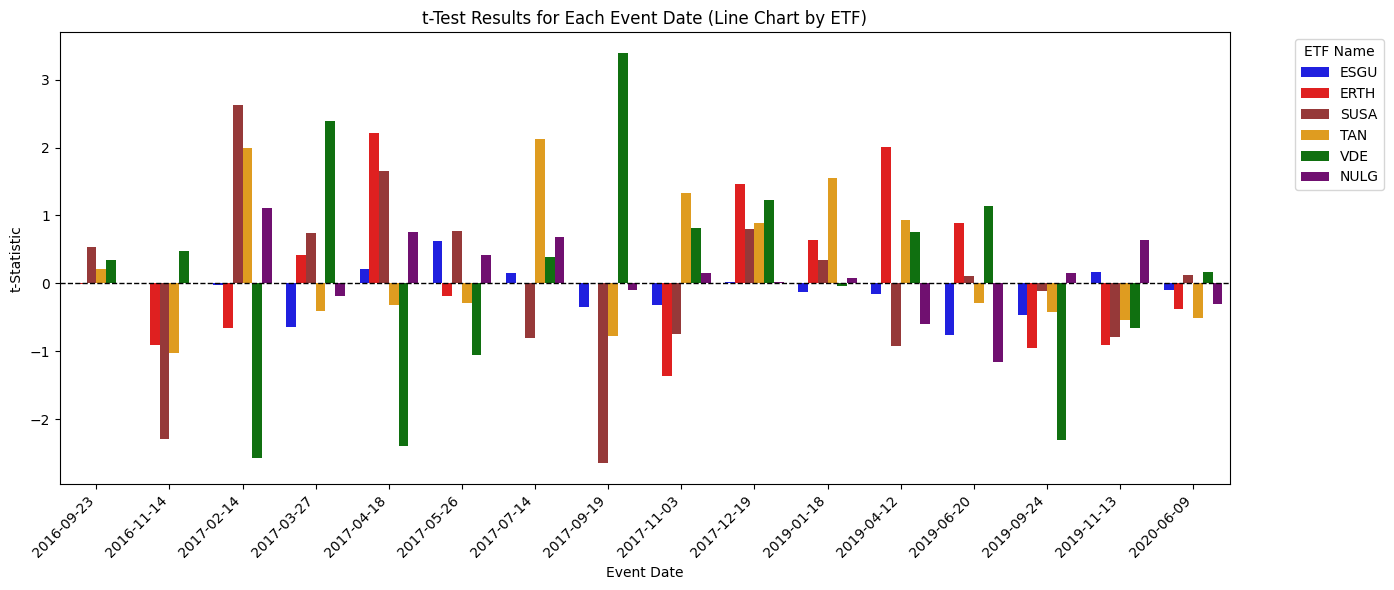

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# 이벤트 날짜별 t-stat 값 필터링
event_results = final_df[final_df['Event_Flag'] == 1][['ETF_Name', 't_test', 'p_value']].reset_index()

# Date 열을 datetime 형식으로 변환 (이 부분이 핵심 수정)
event_results['Date'] = pd.to_datetime(event_results['Date'])

# 날짜순으로 정렬
event_results = event_results.sort_values('Date')

custom_colors = {
    'ESGU': 'blue',
    'ERTH': 'red',
    'VDE': 'green',
    'NULG': 'purple',
    'TAN': 'orange',
    'SUSA': 'brown'
}

# 그래프 크기 설정
plt.figure(figsize=(14, 6))

# ETF별 t-검정 값을 꺾은선 그래프로 시각화
sns.barplot(data=event_results, x='Date', y='t_test', hue='ETF_Name', palette=custom_colors)

# 수평 기준선 (t = 0)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# 그래프 라벨 및 제목
plt.ylabel("t-Statistic")
plt.xlabel("Event Date")
plt.title("t-Test Results for Each Event Date (Line Chart by ETF)")

# 날짜 포맷팅
plt.xticks(rotation=45, ha='right')

# 범례 위치 조정
plt.legend(title="ETF Name", bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 출력
plt.tight_layout()
plt.show()
